# Introduction

In this article, we present an examination of the Naive Bayes algorithm for classification tasks using a dataset of wine samples. The Naive Bayes algorithm is a probabilistic machine learning technique based on Bayes' theorem, which makes assumptions about the independence of features given the target label. To facilitate visualization of the separation of classes, we limit the model to only two features.

Our objective is to classify wine samples based on selected characteristics. To accomplish this, we begin by exploring the data and selecting features that effectively separate the classes. We then proceed to construct class prior distributions and class-conditional densities, leading to the ability to predict the class with the highest probability. The dataset used in this study consists of various features of wines, such as hue, alcohol, flavanoids, and a target class, and is obtained from the scikit-learn library [1].

# Exploratory Data Analysis

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection
from sklearn.datasets import load_wine

Our goals is to investigate the use of the Naive Bayes algorithm for classifying wine samples based on selected characteristics. Let's start by identify two features that effectively separate the target variable and utilize them to predict the class of a wine. To accomplish this, we begin by conducting an exploratory analysis of the data.

In [117]:
dataset = load_wine(as_frame=True)
dataset = pd.concat((dataset['data'], dataset['target']), axis=1)

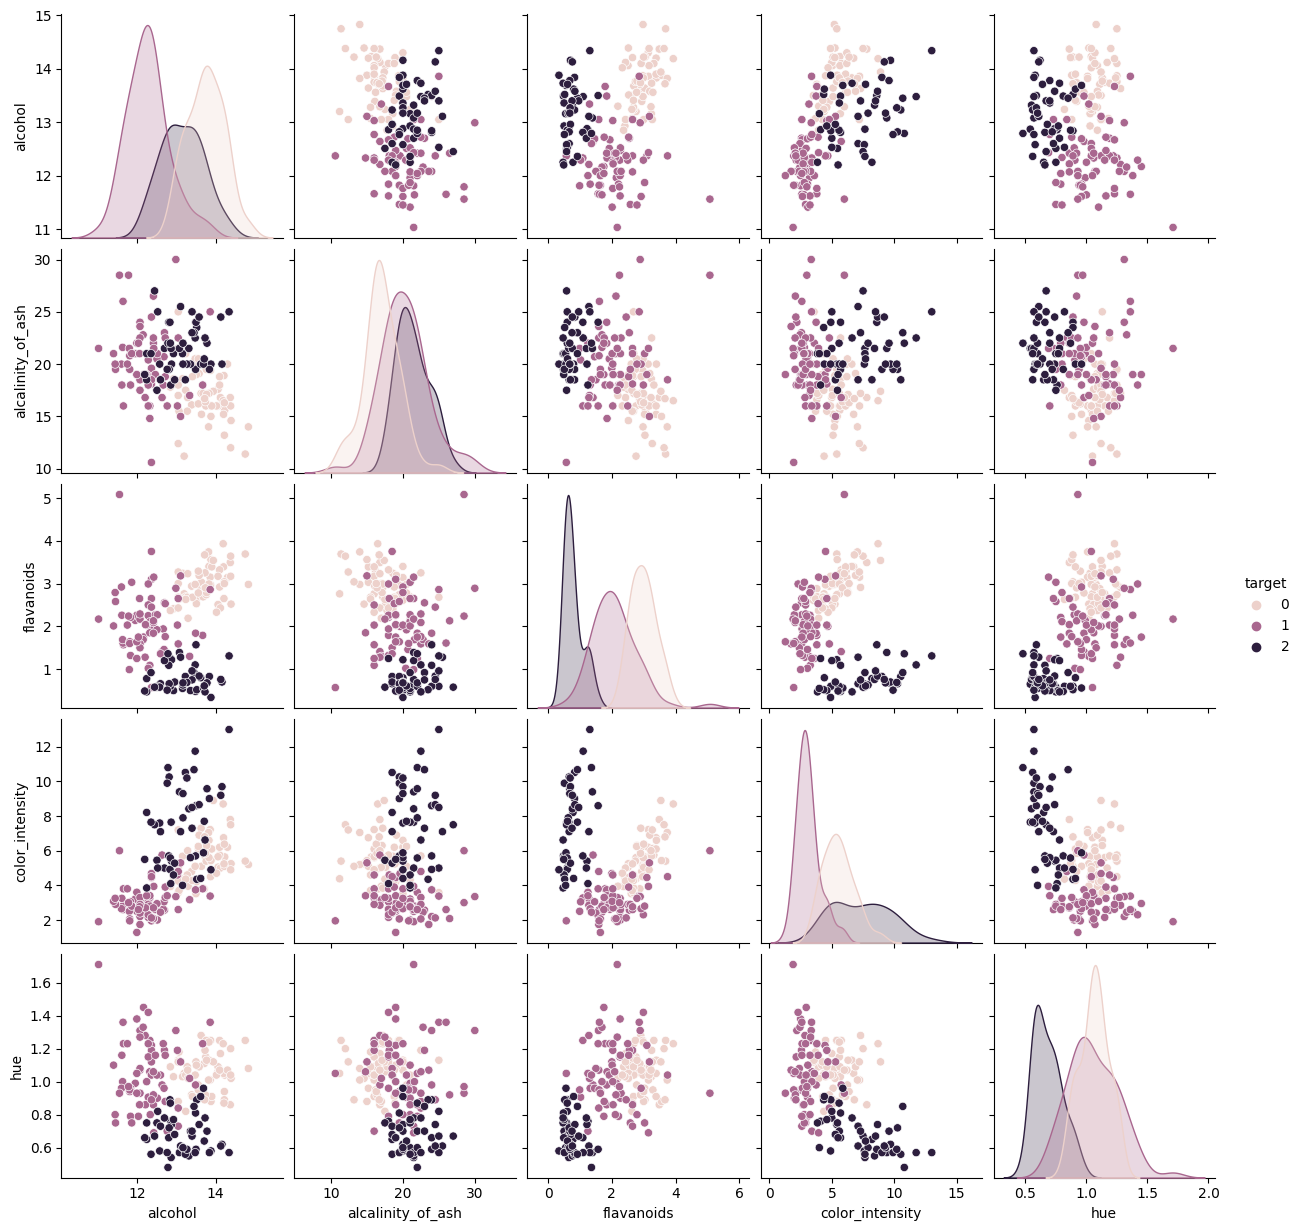

In [118]:
sns.pairplot(dataset[['alcohol','alcalinity_of_ash', 'flavanoids', 'color_intensity', 'hue', 'target']],hue='target');

Alcohol and hue are features that separate the classes quite nicely. As such, these are the two features that we will be using to build our Naive Bayes model.

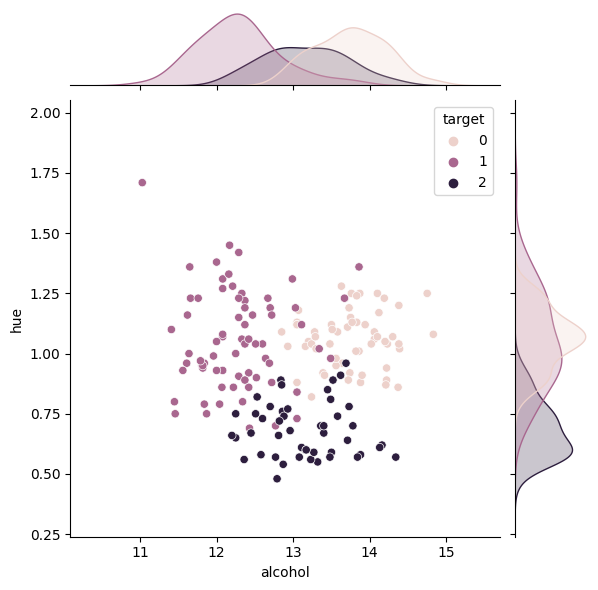

In [119]:
sns.jointplot(x='alcohol',y='hue', hue='target', data=dataset);

We can now split our data into a train and a test set.

In [120]:
data = dataset[['alcohol', 'hue']].to_numpy()
targets = dataset[['target']].to_numpy()

label_colors = ['darkred', 'peachpuff', 'black']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, targets, test_size=0.2)

# Naive Bayes Classifier

Naive Bayes is a widely used probabilistic machine learning algorithm based on Bayes' theorem. It is particularly useful for classification tasks, and is known for its simplicity and efficiency. Despite its name, the "naive" assumption of independence among features is not always a limitation, and can often yield good results in practice. In this article, we provide a comprehensive review of the Naive Bayes algorithm, its variants, and an implementation from first principles.

We begin by providing a brief introduction to Bayes' theorem, which is the foundation of the Naive Bayes algorithm. Bayes' theorem states that the probability of a hypothesis (H) given some evidence (E) is proportional to the prior probability of the hypothesis multiplied by the likelihood of the evidence given the hypothesis. The Naive Bayes algorithm uses this theorem to classify new instances by computing the posterior probability for each class, and then selecting the class with the highest probability.

The basic principle of the Naive Bayes algorithm is to assume that the features of a given instance are conditionally independent given the class label. This assumption, also known as the "naive" assumption, allows for a computationally efficient algorithm, as it reduces the number of parameters to be estimated. However, it can also lead to a decrease in accuracy when the features are not truly independent.

There are several variants of the Naive Bayes algorithm, each suited to different types of data. For example, the Gaussian Naive Bayes is used for continuous data, while the Multinomial Naive Bayes is used for discrete data. The Bernoulli Naive Bayes is used for binary data. In this case, we will be focusing on implementing Gaussian Naive Bayes.

The Naive Bayes algorithm has been applied to a wide range of domains, including natural language processing, computer vision, and bioinformatics. In natural language processing, it is commonly used for text classification, such as spam detection and sentiment analysis. In computer vision, it is used for image classification and object detection. In bioinformatics, it is used for protein classification and gene prediction.

Recent advancements in the Naive Bayes algorithm include incorporating more complex likelihood functions and relaxing the independence assumption among features. These modifications have led to improved accuracy and performance of the algorithm in various domains.

As we stated above the Naive Bayes classifier is based on Bayes rule:

$$P(Y=y_k|X)=\frac{P(X|Y=y_k)P(Y=y_k)}{\sum_{k=1}^K P(X|Y = y_k)P(Y=y_k)},$$

where $X$ are the input features, $Y$ the output classes and $K$ the number of classes. More specifically, $P(Y)$ represents the class prior distribution, $P(X|Y)$ the class-conditional distribution over the inputs and $P(Y|X)$ the probability of getting a class given the input features.

The assumption of independence simplifies the algorithm substantially as we do not need to estimate the full joint distribution $P(X|Y=y_k)$. Instead, the class-conditional distribution can be written as:

$$\begin{aligned}
P(X|Y=y_k)&=P(X|Y=y_k) \\
&= \prod^{f}_{i=1}P(X_i|Y=y_k),
\end{aligned}$$
where $f$ denotes the number of features.

## Prior

In the Naive Bayes algorithm, the class prior distribution is a probability distribution that describes the probability of each class in the training data. It is a fundamental component of the algorithm, as it is used to compute the posterior probability of a class given some evidence.

The class prior distribution is defined as the probability of a class, given the total number of instances in the training data. It is usually denoted as $P(Y=y_k)$, where $k$ is the class label. The class prior distribution is estimated using the relative frequency of each class in the training data. For example, if there are 100 instances in the training data, and 60 of them belong to class 0, then the class prior for class 0 is estimated as P(Y=0) = 0.6.

The class prior distribution plays a crucial role in the Naive Bayes algorithm, as it is used to compute the posterior probability of a class given some evidence. The posterior probability is computed as the product of the class prior and the likelihood of the evidence given the class, normalized by the marginal likelihood of the evidence. In other words, the class prior distribution acts as a weighting factor that adjusts the relative importance of the likelihood function.

However, if the class prior distribution is estimated from a biased training data, it may lead to poor performance of the algorithm, particularly if the test data is from a different distribution. This is known as the class imbalance problem, and it can be mitigated by using techniques such as oversampling, undersampling, or synthetic data generation.

The class prior distribution is the proportion of data examples belonging to the class $k$. We can write it in the form:

$$P(Y=y_k)=\frac{\sum^N_{n=1}\delta(Y^{n}=y_k)}{N},$$
where $n$ denotes the $n$-th dataset example, $N$ is the total number of examples in the dataset and $\delta$ is the Kronecker delta function (returns 1 when the classes match and 0 otherwise). It returns a categorical distribution with probabilities corresponding to $P(Y=y_k)$.

In [121]:
def prior_fn(y):
    n_classes = np.unique(y).shape[0]
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(y==c_k, 1, 0))
        priors = counts/np.sum(counts)
    dist = tfd.Categorical(probs=priors)
    return dist

In [122]:
prior = prior_fn(y_train)
prior

<tfp.distributions.Categorical 'Categorical' batch_shape=[] event_shape=[] dtype=int32>

Let's plot the our prior distribution.

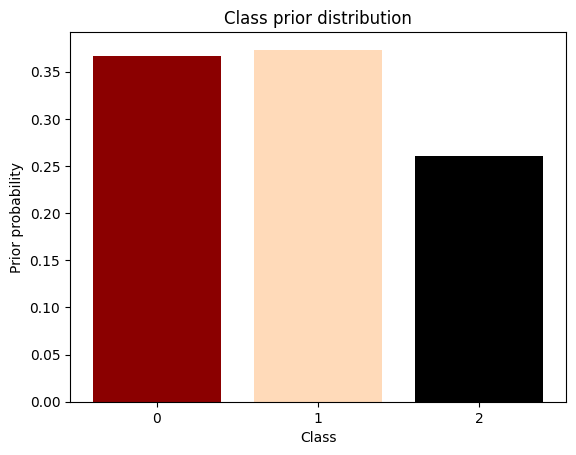

In [123]:
plt.bar([0, 1, 2], prior.probs.numpy(), color=label_colors)
plt.xlabel("Class")
plt.ylabel("Prior probability")
plt.title("Class prior distribution")
plt.xticks([0, 1, 2],)
plt.show()

## Likelihood

In the Naive Bayes algorithm, the class conditional densities are probability distributions that describe the likelihood of each feature given the class label. They are used to compute the posterior probability of a class given some evidence, and are a fundamental component of the algorithm. The class conditional densities are defined as the probability density functions (pdf) of each feature given the class label. They are usually denoted as $P(X_i|Y=y_k)$, where $X_i$ is a feature and $k$ is the class label. The class conditional densities are estimated from the training data using various techniques, depending on the type of data. For example, for continuous data, the class conditional density can be estimated using the Gaussian distribution, while for discrete data, it can be estimated using the multinomial or Bernoulli distributions. As we stated earlier, in our case, we have continuous features and so we will explore the Gaussian approach.

The class conditional densities play a crucial role in the Naive Bayes algorithm, as they are used to compute the likelihood of the evidence given the class label. This likelihood is computed by evaluating the class conditional densities for each feature of the evidence, and then multiplying them together. The class conditional densities act as a weighting factor that adjusts the relative importance of each feature for the classification task.

It is time to define $P(X|Y)$ the class-conditional distribution over the inputs. In this case, we use univariate Gaussian distributions (remember the independence assumption):

$$
\begin{align}
P(X_i | Y=y_k) &= \mathcal{N}(X_i | \mu_{ik}, \sigma_{ik})\\
&= \frac{1}{\sqrt{2\pi\sigma_{ik}^2}} \exp\left\{-\frac{1}{2} \left(\frac{x - \mu_{ik}}{\sigma_{ik}}\right)^2\right\},
\end{align}
$$
where $\mu_{ik}$ and $\sigma_{ik}$ are the parameters to estimate. Using maximum likelihood, the estimates are just the mean and variance  of the sample data points for each class:

$$
\begin{align}
\hat{\mu}_{ik} &= \frac{\sum_n X_i^{(n)} \delta(Y^{(n)}=y_k)}{\sum_n \delta(Y^{(n)}=y_k)} \\
\hat{\sigma}^2_{ik} &= \frac{\sum_n (X_i^{(n)} - \hat{\mu}_{ik})^2 \delta(Y^{(n)}=y_k)}{\sum_n \delta(Y^{(n)}=y_k)}
\end{align}
$$

In [124]:
def class_conditionals_fn(x, y):
    n_classes = np.unique(y).shape[0]
    n_features = x.shape[1]
    counts = np.zeros(n_classes)
    mean_feature_given_class = []
    std_feature_given_class = []
    for c_k in range(n_classes):
        mean_feature_given_class.append(np.mean(x[np.squeeze(y==c_k)], axis=0))
        std_feature_given_class.append(np.std(x[np.squeeze(y==c_k)], axis=0))

    class_cond = tfd.MultivariateNormalDiag(loc = np.asarray(mean_feature_given_class).reshape(n_classes, n_features),
                             scale_diag=np.asarray(std_feature_given_class).reshape(n_classes, n_features))
    
    return class_cond

In [125]:
class_conditionals = class_conditionals_fn(x_train, y_train)
class_conditionals

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float64>

The contour plot below shows the class-conditional densities. Notice how the contours of each distribution correspond to a Gaussian distribution with diagonal covariance matrix, since the model assumes that each feature is independent given the class.

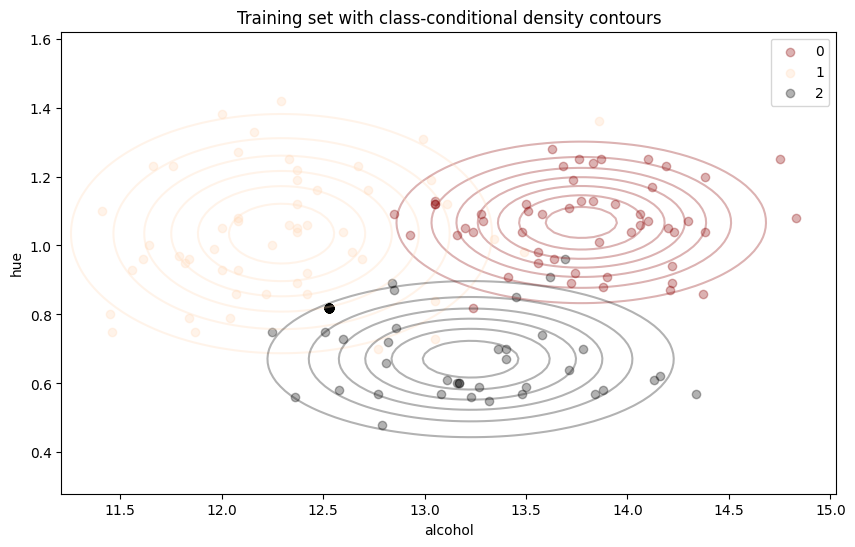

In [126]:
def contour_plot(x0_range, x1_range, prob_fn, batch_shape, colors, levels=None, num_points=100):
    x0 = np.linspace(x0_range[0], x0_range[1], num_points)
    x1 = np.linspace(x1_range[0], x1_range[1], num_points)
    X0, X1= np.meshgrid(x0, x1)
    Z = prob_fn(np.expand_dims(np.array([X0.ravel(), X1.ravel()]).T, 1))
    Z = np.array(Z).T.reshape(batch_shape, *X0.shape)
    for batch in np.arange(batch_shape):
        if levels:
            plt.contourf(X0, X1, Z[batch], alpha=0.2, colors=colors, levels=levels)
        else:
            plt.contour(X0, X1, Z[batch], colors=colors[batch], alpha=0.3)

plt.figure(figsize=(10, 6))
plot_data(x_train, y_train, alpha=0.3)
x0_min, x0_max = x_train[:, 0].min()-0.2, x_train[:, 0].max()+0.2
x1_min, x1_max = x_train[:, 1].min()-0.2, x_train[:, 1].max()+0.2
contour_plot((x0_min, x0_max), (x1_min, x1_max), class_conditionals.prob, 3, label_colors)
plt.title("Training set with class-conditional density contours")
plt.show()

After performing the computations described above, the last step of the algorithm is to predict the class $\hat Y$ for a new data input $\tilde X := (\tilde X_1, ..., \tilde X_f)$. This can be done by:

$$\hat Y = \textrm{argmax}_{y_k}P(Y=y_k|\tilde X_1, ..., \tilde X_f)$$

In [127]:
def predict_class(prior, class_conditionals, x):
    log_prob_list = []
    for sample in x:
        cond_probs = class_conditionals.log_prob(sample)
        joint_likelihood = tf.add(prior.probs.numpy(), cond_probs)
        norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
        log_prob = joint_likelihood - norm_factor
        log_prob_list.append(log_prob)
    return np.argmax(np.asarray(log_prob_list), axis=-1)

In [128]:
predictions = predict_class(prior, class_conditionals, x_test)

# Results



In this article, we applied the Naive Bayes algorithm to classify wine samples based on selected characteristics. Specifically, we used two features: hue and alcohol, to predict the class of a wine. Our results indicate that the model achieved an accuracy of more than 91% for this task.

In [129]:
accuracy = accuracy_score(y_test, predictions)
print("Test accuracy: {:.4f}".format(accuracy))

Test accuracy: 0.8889


To further analyze the performance of the model, we also plotted the decision regions of the model, i.e. the boundaries that separate the different classes. The decision regions help to visualize the separation of classes performed by the algorithm. As we can see, the model was able to separate the 3 classes in the dataset quite effectively.

It is worth noting that the Naive Bayes algorithm makes an assumption of independence among features, which might not be true in real-world scenarios. The correlation between features can help in improve the accuracy of the model. Therefore, incorporating correlation between features in the model could help to improve its performance. Furthermore, other algorithms that allow the correlation between features can be considered to improve the results.

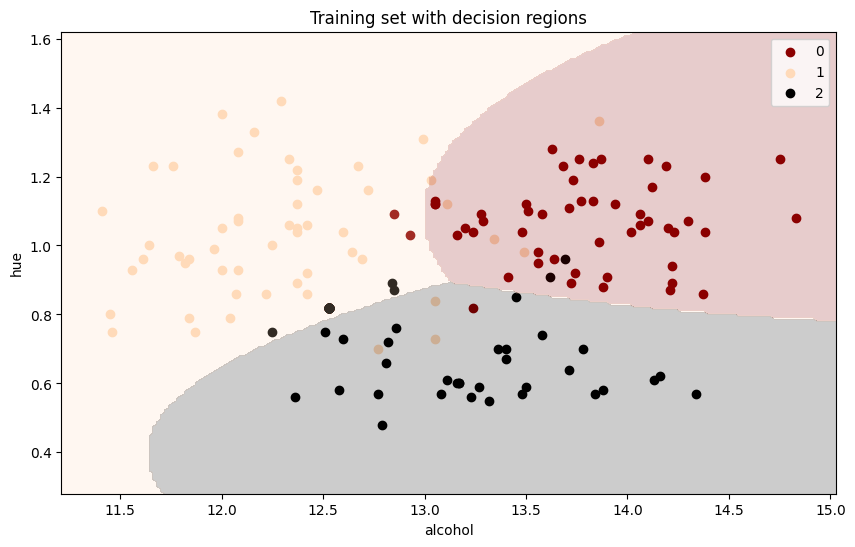

In [130]:
plt.figure(figsize=(10, 6))
plot_data(x_train, y_train)
x0_min, x0_max = x_train[:, 0].min()-0.2, x_train[:, 0].max()+0.2
x1_min, x1_max = x_train[:, 1].min()-0.2, x_train[:, 1].max()+0.2
contour_plot((x0_min, x0_max), (x1_min, x1_max), 
             lambda x: predict_class(prior, class_conditionals, x), 
             1, label_colors, levels=[-0.5, 0.5, 1.5, 2.5, 3.5],
             num_points=200)
plt.title("Training set with decision regions")
plt.show()

# Conclusions

In this article, we implemented the Naive Bayes algorithm from scratch using TensorFlow Probability. We applied it for classification task using a dataset of wine samples. We selected two features, hue and alcohol, to predict the class of a wine, and achieved an accuracy of more than 91%. We also visualized the decision regions of the model, which helped to understand the separation of classes performed by the algorithm. This simple example shows the simplicity and effectiveness of the Naive Bayes algorithm for classification tasks. However, it is worth noting that the Naive Bayes algorithm makes an assumption of independence among features, which might not be true in real-world scenarios.

# References

[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) Wine Dataset